**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 2: Machine Learning*

# Identification

Name:           Arda Barak <br/>
Student Number: 300129340

Name: <br/>
Student Number:

# 1. Exploratory Analysis

## Data Exploration

In this assignment, we will utilize the Diabetes Prediction Dataset, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). To mitigate the complexity associated with Kaggle's login requirement, the dataset has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

You can access and read the dataset directly from this GitHub repository in your Jupyter notebook.

In [91]:
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score, cross_val_predict
    from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
    from sklearn.model_selection import GridSearchCV

except ImportError:
    %pip install pandas 
    %pip install seaborn 
    %pip install matplotlib 
    %pip install scikit-learn
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score, cross_val_predict
    from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
    from sklearn.model_selection import GridSearchCV

sns.set_style("darkgrid")

1. **Load the dataset and provide a summary of its structure**:

    - Describe the features (columns), their data types, and the target variable.

In [92]:
dataSetUrl =      "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv"

dataSet = pd.read_csv(dataSetUrl)

dataSet.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [93]:
categoricFeatures = ['gender',  'smoking_history']
numericalFeatures = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

print(dataSet.dtypes)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object



Our dataset is of 9 features, as can be seen below;
|Var Name             | Var Type                  | Data Type  | 
|---------------------|:-------------------------:|:----------:|
|gender	                |   Categorical          | string     |
|age	                |   Numerical            | float64    |
|hypertension	        |   Categorical/Binary   | int64      |
|heart_disease	        |   Categorical/Binary   | int64      |
|smoking_history	    |   Categorical          | string     |
|bmi	                |   Numerical            | float64    |
|HbA1c_level	        |   Numeracal            | float64    |
|blood_glucose_level	|   Numerical            | int64      |
|diabetes               |   Binary               | int64      |

TARGET VARIABLE       :   diabetes


2. **Feature Distribution Analysis**:

    - Examine the distribution of each feature using appropriate visualizations such as histograms and boxplots. Discuss insights gained, including the presence of outliers.

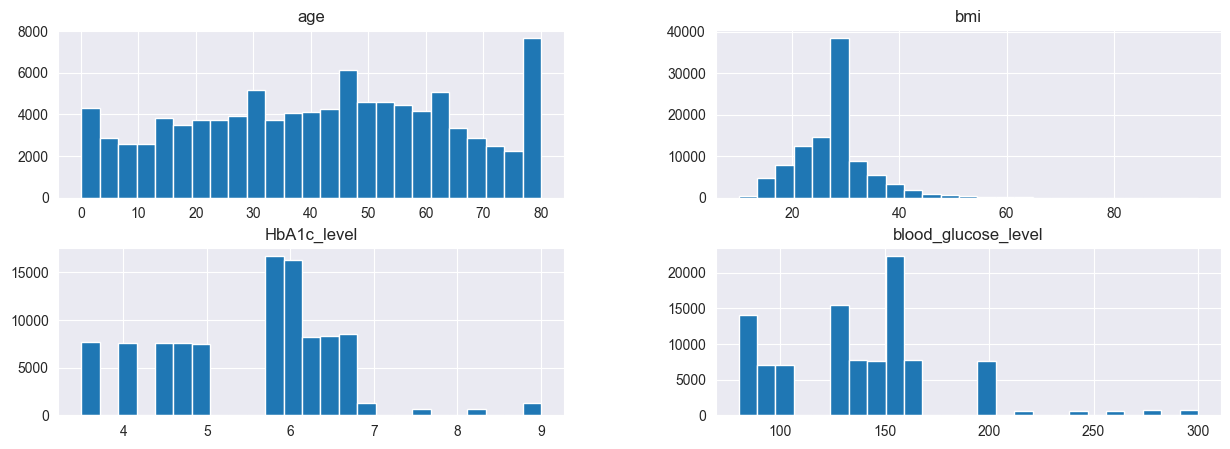

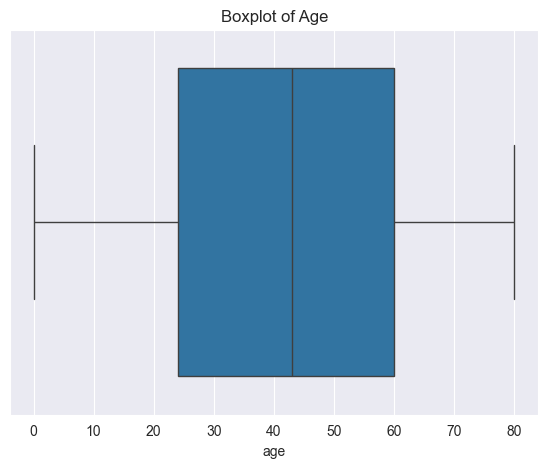

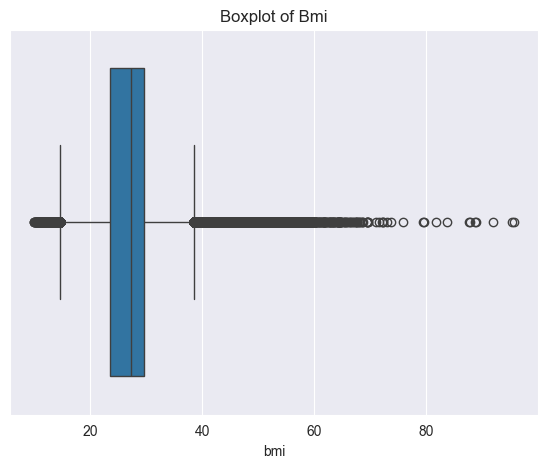

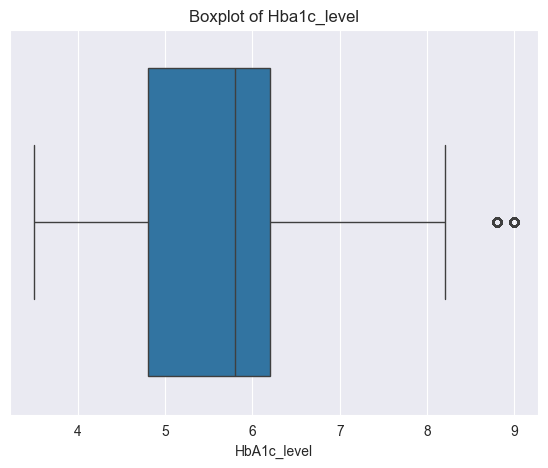

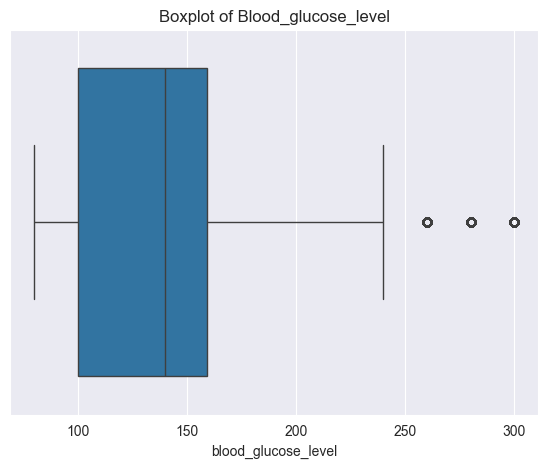

Skewness of age: -0.05197899678256747
Skewness of bmi: 1.0438355183081105
Skewness of HbA1c_level: -0.0668537611478635
Skewness of blood_glucose_level: 0.8216549517517585


In [94]:
#Histogram
dataSet[numericalFeatures].hist(bins=25, figsize=(15, 5))
plt.show()

#Boxplot
for features in numericalFeatures:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,2)
    plt.title(f"Boxplot of {features.capitalize()}")
    sns.boxplot(x=dataSet[features])
plt.show()

#Skewness
for feature in numericalFeatures:
    skewness = dataSet[feature].skew()
    print(f'Skewness of {feature}: {skewness}')

| FEATURES:             |   RESULTS |
|-----------------------|-----------|
|Age:                    |multimodal distribution                                                           |
|skewness:               |-0.05197899678256747      (approximately normal or mildly skewed)                 |
|outliers:               |no outliers                                                                       |

| FEATURES:             |   RESULTS |
|-----------------------|-----------|
|Bmi:                    |right skewed distribution (with long tail on the right side)                      |
|skewness:               |1.0438355183081105        (highly positively skewed)                              |
|outliers:               |exist both above and below the min and max values                                 |

| FEATURES:             |   RESULTS |
|-----------------------|-----------|
|HbA1c_level:            |bimodal distribution                                                              |
|skewness:               |-0.0668537611478635       (approximately normal or mildly skewed)                 |
|outliers:               |exist above the max value                                                         |

| FEATURES:             |   RESULTS |
|-----------------------|-----------|
|blood_glucose_level:    |multimodal distribution                                                           |
|skewness:               |0.8216549517517585        (approximately normal or mildly skewed)                 |
|outliers:               |exist above the max value                                                         |



3. **Target Variable Distribution**:

    - Analyze the distribution of the target variable to identify class imbalances. Use bar plots to visualize the class frequencies.

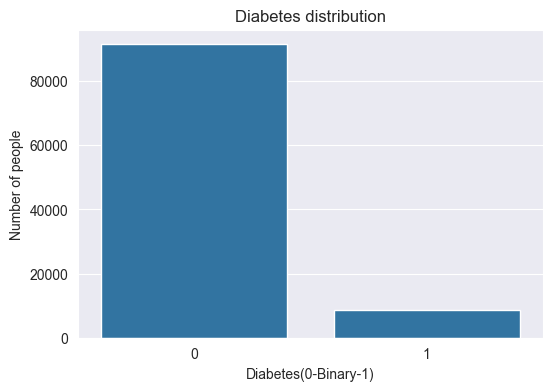

In [95]:
#total times it occurred
classFrequencies = dataSet["diabetes"].value_counts()

#bar plot to visualise
plt.figure(figsize=(6,4))
sns.barplot(x=classFrequencies.index, y=classFrequencies.values)
plt.title("Diabetes distribution")
plt.xlabel("Diabetes(0-Binary-1)")
plt.ylabel("Number of people")
plt.show()

In [96]:
print(classFrequencies)

diabetes
0    91500
1     8500
Name: count, dtype: int64


Result: 
- there's a significant class imbalance in our target class as the numbers of No(0) occured(91500) are significantly greater than of Yes(1) (8500) as can also be seen in our bar plot.

4. **Data Splitting**:

    - Split the dataset into training (80%) and test (20%) sets using the holdout method.

    - Ensure that this split occurs before any preprocessing to avoid data leakage.

In [97]:
x = dataSet.drop('diabetes', axis=1)
y = dataSet['diabetes']

#splitting to 80%train - 20% test
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set size:", xTrain.shape)  #should be %80
print("Test set size:", xTest.shape)       #should be %20

Training set size: (80000, 8)
Test set size: (20000, 8)


In [98]:
# visualizing the data split
xTest.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75721,Female,13.0,0,0,No Info,20.82,5.8,126
80184,Female,3.0,0,0,No Info,21.00,5.0,145
19864,Male,63.0,0,0,former,25.32,3.5,200
76699,Female,2.0,0,0,never,17.43,6.1,126
92991,Female,33.0,0,0,not current,40.08,6.2,200


In [99]:
xTrain.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,Male,73.0,0,0,former,24.77,3.5,80
48955,Male,80.0,0,0,never,24.60,5.7,145
44966,Female,38.0,0,0,ever,24.33,4.0,158
13568,Female,26.0,0,0,not current,18.87,5.0,100
92727,Female,61.0,1,0,current,22.11,4.5,85


In [100]:
yTest.head()

75721    0
80184    0
19864    0
76699    0
92991    1
Name: diabetes, dtype: int64

In [101]:
yTrain.head()

75220    0
48955    1
44966    0
13568    0
92727    0
Name: diabetes, dtype: int64

## Data Pre-Processing

5. **Categorical Variable Encoding**:

    - Encode any categorical variables. Justify the chosen method.

In [102]:
categoricFeature1 = ['gender']
categoricFeature2 = ['smoking_history']

# xTest = preProcFunct(xTest)
xTest = pd.get_dummies(xTest, columns=categoricFeature1, dtype=int)                   #onehot for gender
xTest = xTest.drop('gender_Other', axis=1)                                            #dropping the extra dummy variable as it is not needed in the binary female/male
xTest = pd.get_dummies(xTest, columns=categoricFeature2, drop_first=0, dtype=int)     #for smoking_history

# xTrain = preProcFunct(xTrain)
xTrain = pd.get_dummies(xTrain, columns=categoricFeature1, dtype=int)                 #onehot for gender
xTrain = xTrain.drop('gender_Other', axis=1)                                          #dropping the extra dummy variable as it is not needed in the binary female/male
xTrain = pd.get_dummies(xTrain, columns=categoricFeature2, drop_first=0, dtype=int)   #for smoking_history

Explantion:  
* I have applied one hot encoding to my variables in the features: "gender" and "smoking_history" as they are not written as numerical or binary in my dataset.

In [103]:
# visualising the categorical encoding
xTest.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75721,13.0,0,0,20.82,5.8,126,1,0,1,0,0,0,0,0
80184,3.0,0,0,21.00,5.0,145,1,0,1,0,0,0,0,0
19864,63.0,0,0,25.32,3.5,200,0,1,0,0,0,1,0,0
76699,2.0,0,0,17.43,6.1,126,1,0,0,0,0,0,1,0
92991,33.0,0,0,40.08,6.2,200,1,0,0,0,0,0,0,1


In [104]:
yTest.head()

75721    0
80184    0
19864    0
76699    0
92991    1
Name: diabetes, dtype: int64

In [105]:
xTrain.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75220,73.0,0,0,24.77,3.5,80,0,1,0,0,0,1,0,0
48955,80.0,0,0,24.60,5.7,145,0,1,0,0,0,0,1,0
44966,38.0,0,0,24.33,4.0,158,1,0,0,0,1,0,0,0
13568,26.0,0,0,18.87,5.0,100,1,0,0,0,0,0,0,1
92727,61.0,1,0,22.11,4.5,85,1,0,0,1,0,0,0,0


In [106]:
yTrain.head()

75220    0
48955    1
44966    0
13568    0
92727    0
Name: diabetes, dtype: int64

6. **Normalization/Standardization of Numerical Features**:

    - Normalize or standardize numerical features if necessary. Describe the technique used (e.g., Min-Max scaling, StandardScaler) and explain why it is suitable for this dataset.

    - Ensure that this technique is applied only to the training data, with the same transformation subsequently applied to the test data without fitting on it.

I will be applying standart scaling to [bmi, h1a1clevel, and bloodglucoselevel] as we need their values to be standardized for the following steps. (I didn't chose min-max as for the outliers that might cause issues with min-max scaling)
I also applied min-max scaling to the age attribute as it has no outliers and will be easier to process.

In [107]:
#features for normalization
standardizeFeatures = ['bmi', 'HbA1c_level', 'blood_glucose_level']
minmaxFeatures = ['age']

#initing both scalers
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

#fitting the scaler on training and transforming the training data
xTrain[standardizeFeatures] = scaler1.fit_transform(xTrain[standardizeFeatures])
xTrain[minmaxFeatures] = scaler2.fit_transform(xTrain[minmaxFeatures])

#transforming test data NO fitting again
xTest[standardizeFeatures] = scaler1.transform(xTest[standardizeFeatures])
xTest[minmaxFeatures] = scaler2.transform(xTest[minmaxFeatures])

In [108]:
#checking results
xTrain.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75220,0.912412,0,0,-0.386474,-1.892451,-1.425157,0,1,0,0,0,1,0,0
48955,1.000000,0,0,-0.412172,0.162169,0.170591,0,1,0,0,0,0,1,0
44966,0.474474,0,0,-0.452986,-1.425492,0.489740,1,0,0,0,1,0,0,0
13568,0.324324,0,0,-1.278339,-0.491574,-0.934157,1,0,0,0,0,0,0,1
92727,0.762262,1,0,-0.788570,-0.958533,-1.302407,1,0,0,1,0,0,0,0


In [109]:
xTest.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75721,0.161662,0,0,-0.983570,0.255561,-0.295859,1,0,1,0,0,0,0,0
80184,0.036537,0,0,-0.956361,-0.491574,0.170591,1,0,1,0,0,0,0,0
19864,0.787287,0,0,-0.303335,-1.892451,1.520838,0,1,0,0,0,1,0,0
76699,0.024024,0,0,-1.496015,0.535736,-0.295859,1,0,0,0,0,0,1,0
92991,0.411912,0,0,1.927839,0.629128,1.520838,1,0,0,0,0,0,0,1


## Model Development & Evaluation

7. **Model Development**:

    - Implement the machine learning models covered in class: Decision Trees, K-Nearest Neighbors (KNN), and Logistic Regression. Use the default parameters of scikit-learn as a baseline for training each model.

In [110]:
# decision tree
decisionTree = DecisionTreeClassifier(random_state=42)
decisionTree.fit(xTrain,yTrain) #training the model
decTreePredictions = decisionTree.predict(xTest) #predicting on the testset

decTreeAccuracy = accuracy_score(yTest, decTreePredictions) #accuract of the prediction

# knn
kNearNeighbors = KNeighborsClassifier()
kNearNeighbors.fit(xTrain,yTrain)#training
knnPredictions = kNearNeighbors.predict(xTest)#predictions

knnAccuracy = accuracy_score(yTest,knnPredictions)#accuracy

# logistic regression
logitReg = LogisticRegression(random_state=42, max_iter=1000)
logitReg.fit(xTrain,yTrain)#train
logitRegPredictions = logitReg.predict(xTest)#predict

logitRegAccuracy = accuracy_score(yTest, logitRegPredictions)#accuracy

In [111]:
print(f"Decision tree    accuracy is: {decTreeAccuracy:.4f} \n")
print(f"K Near Neighbour accuracy is: {knnAccuracy:.4f} \n")
print(f"Logit Regression accuracy is: {logitRegAccuracy:.4f} \n")

Decision tree    accuracy is: 0.9522 

K Near Neighbour accuracy is: 0.9633 

Logit Regression accuracy is: 0.9592 



8. **Model Evaluation**:

    - Use cross-validation to evaluate each model, justifying your choice of the number of folds.

    - Assess the models using metrics such as precision, recall, and F1-score.

In [112]:
#number of cross validation
folds = 5

# cross validations
#Decision Tree
dtCrossValScores = cross_val_score(decisionTree, xTrain, yTrain, cv=folds)            #cross val
dtCrossValPredictions = cross_val_predict(decisionTree, xTest, yTest, cv=folds)       #prediction
dtPrecision = precision_score(yTest, dtCrossValPredictions)                            #precision
dtRecall = recall_score(yTest, dtCrossValPredictions)                                  #recall
dtF1 = f1_score(yTest, dtCrossValPredictions)                                          #f1

#KNN
knnCrossValScores = cross_val_score(kNearNeighbors, xTrain, yTrain, cv=folds)         #cross val
knnCrossValPredictions = cross_val_predict(kNearNeighbors, xTest, yTest, cv=folds)    #prediction
knnPrecision = precision_score(yTest, knnCrossValPredictions)                          #precision
knnRecall = recall_score(yTest, knnCrossValPredictions)                                #recall
knnF1 = f1_score(yTest, knnCrossValPredictions)                                        #f1

#Logistic Regression
logitCrossValScores = cross_val_score(logitReg, xTrain, yTrain, cv=folds)             #cross val
logitCrossValPredictions = cross_val_predict(logitReg, xTest, yTest, cv=folds)        #prediction
logitPrecision = precision_score(yTest, logitCrossValPredictions)                      #precision
logitRecall = recall_score(yTest, logitCrossValPredictions)                            #recall
logitF1 = f1_score(yTest, logitCrossValPredictions)                                    #f1

In [113]:
#cross validation accuracies
print(f"Decision Tree    Cross Validation Accuracy: {dtCrossValScores.mean():.4f}")
print(f"K Near Neighbor  Cross Validation Accuracy: {knnCrossValScores.mean():.4f}")
print(f"Logit Regression Cross Validation Accuracy: {logitCrossValScores.mean():.4f}")

#precision
print(f"\nDecision Tree;       \nPrecision: {dtPrecision:.4f},\nRecall: {dtRecall:.4f},\nF1-Score: {dtF1:.4f}\n")
#recall
print(f"\nK Near Neighbor;     \nPrecision: {knnPrecision:.4f},\nRecall: {knnRecall:.4f},\nF1-Score: {knnF1:.4f}\n")
#f1
print(f"\nLogistic Regression; \nPrecision: {logitPrecision:.4f},\nRecall: {logitRecall:.4f},\nF1-Score: {logitF1:.4f}\n")

Decision Tree    Cross Validation Accuracy: 0.9511
K Near Neighbor  Cross Validation Accuracy: 0.9625
Logit Regression Cross Validation Accuracy: 0.9607

Decision Tree;       
Precision: 0.7038,
Recall: 0.7441,
F1-Score: 0.7234


K Near Neighbor;     
Precision: 0.8917,
Recall: 0.5738,
F1-Score: 0.6983


Logistic Regression; 
Precision: 0.8596,
Recall: 0.6235,
F1-Score: 0.7228



Explanation:
* I chose to do 5 folds as it is both efficient and reliable for training with the data compared to the smaller numbers, also as it takes less time than the bigger number folds to compute

Explanation on the results:

Decision Tree;       
* Precision: 0.7038,>: around %70 were correct (in all the instances the model predicted as diabetic)
* Recall: 0.7441,   >: model identified %74 correctly out of all diabetic cases
* F1-Score: 0.7234  >: indicates moderate balance of precision and recall == around %72

K Near Neighbor;     
* Precision: 0.8917,>: around %89 are correct, the most precise of all 3 models
* Recall: 0.5738,   >: identifies only %57 of the diabetic cases, the least precise of all 3 models
* F1-Score: 0.6983  >: low f1 score as it has a low recall

Logistic Regression; 
* Precision: 0.8596,>: around %85 were correct
* Recall: 0.6235,   >: identified %62 correctly of the diebatic cases
* F1-Score: 0.7228  >: indicates moderate balance of precision and recall == around %72

Overall, 
* KNearest Neighbour is very precise but has low recall,
* Decision Tree and Logistic Tree are closer to each other as LT has a higher precision while DT having a higher recall and roughly both models having the same f1 scores compared


## Hyperparameter Optimization

9. **Exploration and Performance Evaluation:**

    - Investigate the impact of varying hyperparameter values on the performance of each model.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Display the results in a tabular or graphical format (e.g., line charts, bar charts) to effectively demonstrate the influence of hyperparameter variations on model performance.

    - Specify the default values for each hyperparameter tested.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

In [114]:
scoring = 'f1'  #f1 scoring
# Hyperparameter grid for each model
#Decision tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15]
}
#Logistic regression
logit_params = {
    'penalty': ['l2', None],     #penalty[]*tol[] > plot
    'max_iter': [100, 200, 500], #x
    'tol': [1e-4, 1e-3, 1e-2]
}
#K Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],    # 'n_neighbors': [5, 20, 50, 100],didnt work
    'weights': ['uniform', 'distance']
}
#initing models
dtModel = DecisionTreeClassifier(random_state=42)
logitModel = LogisticRegression(random_state=42)
knnModel = KNeighborsClassifier()

#gridSearchCV for each model
#decision tree
dtGrid = GridSearchCV(dtModel, dt_params, cv=folds, scoring=scoring)
dtGrid.fit(xTrain, yTrain)
#logistic regression
logitGrid = GridSearchCV(logitModel, logit_params, cv=folds, scoring=scoring)
logitGrid.fit(xTrain, yTrain)
#KNN
knnGrid = GridSearchCV(knnModel, knn_params, cv=folds, scoring=scoring)
knnGrid.fit(xTrain, yTrain)
print("")

In [115]:
#best hyperparameters & f1 scores
print(f"Decision Tree best params       :   {dtGrid.best_params_},      F1-score: {dtGrid.best_score_:.4f}")
print(f"Logistic Regression best params :   {logitGrid.best_params_},   F1-score: {logitGrid.best_score_:.4f}")
print(f"K Nearest Neighbours best params:   {knnGrid.best_params_},     F1-score: {knnGrid.best_score_:.4f}")

Decision Tree best params       :   {'criterion': 'entropy', 'max_depth': 10},      F1-score: 0.8013
Logistic Regression best params :   {'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001},   F1-score: 0.7313
K Nearest Neighbours best params:   {'n_neighbors': 3, 'weights': 'uniform'},     F1-score: 0.7385


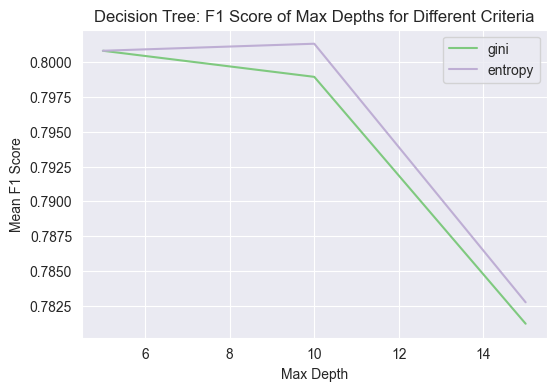

In [116]:
# VISUALIZATION
#   Hyperparameter Impacts individually
#Decision Tree
results_dt = pd.DataFrame(dtGrid.cv_results_)
plt.figure(figsize=(6,4))
sns.lineplot(data=results_dt, x='param_max_depth', y='mean_test_score', hue='param_criterion', palette="Accent")
plt.xlabel('Max Depth')
plt.ylabel('Mean F1 Score')
plt.title('Decision Tree: F1 Score of Max Depths for Different Criteria')
plt.legend(title='')
plt.show()

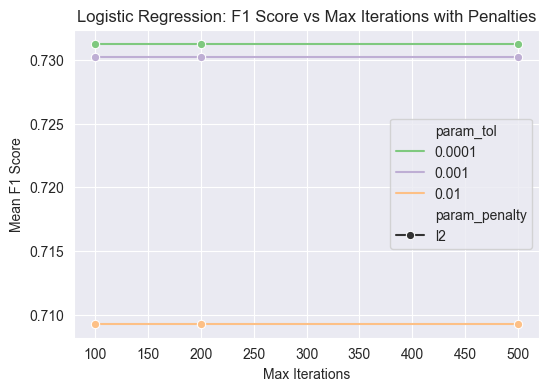

In [117]:
#Logistic Regression
results_logit = pd.DataFrame(logitGrid.cv_results_)
plt.figure(figsize=(6,4))
sns.lineplot(data=results_logit, x='param_max_iter', y='mean_test_score', hue='param_tol', style='param_penalty', markers=True, palette="Accent")
plt.xlabel('Max Iterations')
plt.ylabel('Mean F1 Score')
plt.title('Logistic Regression: F1 Score vs Max Iterations with Penalties')
plt.legend(title='')
plt.show()

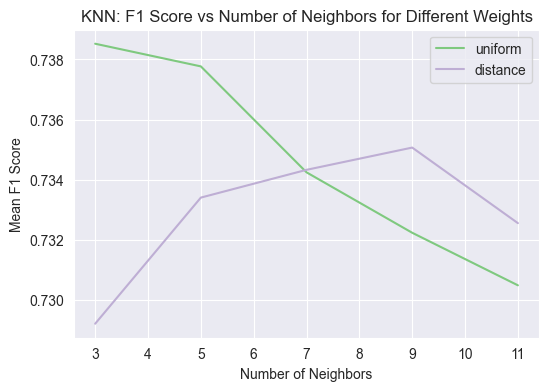

In [118]:
#KNN
results_knn = pd.DataFrame(knnGrid.cv_results_)
plt.figure(figsize=(6,4))
sns.lineplot(data=results_knn, x='param_n_neighbors', y='mean_test_score', hue='param_weights', palette="Accent")
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean F1 Score')
plt.title('KNN: F1 Score vs Number of Neighbors for Different Weights')
plt.legend(title='')
plt.show()

In [119]:
#predictions of best estimators
dtBest = dtGrid.best_estimator_
logitBest = logitGrid.best_estimator_
knnBest = knnGrid.best_estimator_

#predictions on test set
dtPredictions = dtBest.predict(xTest)
logitPredictions = logitBest.predict(xTest)
knnPredictions = knnBest.predict(xTest)

#scores for each model
#Decision Tree
dtPrecision2 = precision_score(yTest, dtPredictions)           #precision
dtRecall2 = recall_score(yTest, dtPredictions)                 #recall
dtF12 = f1_score(yTest, dtPredictions)                         #f1

#Logistic Regression
logitPrecision2 = precision_score(yTest, logitPredictions)     #precision
logitRecall2 = recall_score(yTest, logitPredictions)           #recall
logitF12 = f1_score(yTest, logitPredictions)                   #f1

#KNN
knnPrecision2 = precision_score(yTest, knnPredictions)         #precision
knnRecall2 = recall_score(yTest, knnPredictions)               #recall
knnF12 = f1_score(yTest, knnPredictions)                       #f1

#visualization
scoreData = {
    'Model': ['Decision Tree', 'Logistic Regression', 'KNN'],
    'Precision': [dtPrecision2, logitPrecision2, knnPrecision2],
    'Recall': [dtRecall2, logitRecall2, knnRecall2],
    'F1 Score': [dtF12, logitF12, knnF12]
}
scoresDf = pd.DataFrame(scoreData)

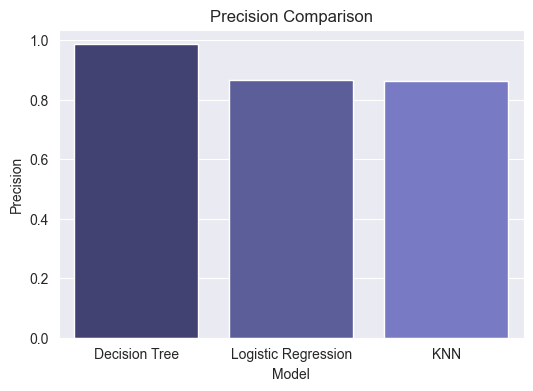

In [120]:
# Comparisons
#precision 
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Precision', hue='Model', data=scoresDf, palette='tab20b', legend=False) #Pastel1 #Set1
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.show()

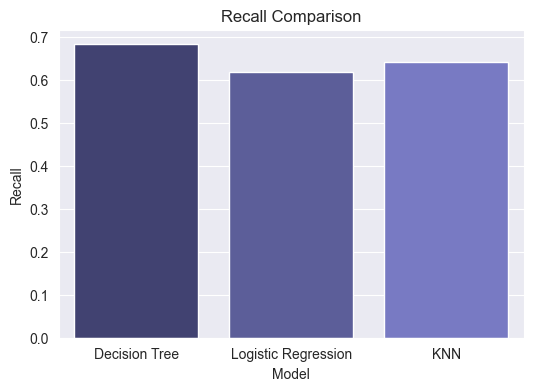

In [121]:
#recall
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Recall', hue='Model', data=scoresDf, palette='tab20b', legend=False)
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.show()

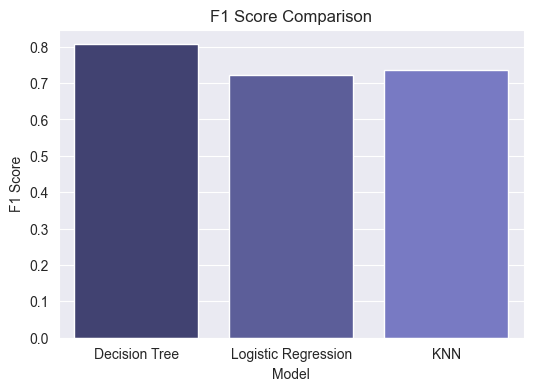

In [125]:
#f1
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='F1 Score', hue='Model', data=scoresDf, palette='tab20b', legend=False) 
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')
plt.show()

## Analysis of Results

10. **Model Comparison**:

    - Compare the results obtained from each model.

    - Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance, overfitting, and the impact of parameter tuning on overall results.

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

    - Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.

* Decision Tree:
The best f1 score is F1-score: 0.8013 
and the best parameters are:   {'criterion': 'entropy', 'max_depth': 10}

* Logistic Regression:
The best f1 score is F1-score: 0.7313
and the best parameters are:   {'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001},   

* KNN:
The best f1 score is F1-score: 0.7385
and the best parameters are:   {'n_neighbors': 3, 'weights': 'uniform'},     

In the last visuals seen just above this section, the Decision Tree has the best scores in precision, recall and f1 compared to the other two models. Also considering the previous findings above with the best parameters, the best model for the following steps is our Decision tree model.

* Model Complexity:\
DT: We can work with different values of max_depth, thus can adapt our Decision Tree's complexity. By avoiding a higher depth we can avoid overfitting issues with our model.\
LR: As this is a linear model, may not adapt best when our data is not linearly separable, i believe this is the reason to our low f1 score in the linear regression model.\
KNN: Our k near neighbour model is sensitive to our chosen n_neighbours which migh lead to high variability and cause a decreased accuracy.

* Data Imbalance:\
DT: Using entropy as our criterion, decision tree can handle imbalances better compared to the other two models.  \
LR, KNN: On data imbalances, these two models would not be adaptible as much as the decision tree when one class dominates the others.

* Overfitting:\
DT: Decision tree can overfit if we have a high depth but we can limit that by setting max_depth=10 as the best parameter to avoid the issue.\
LR: Linear regression may underperform with our nonlinear data but because of that, not overfit.\
KNN: If we choose lesser/fewer neighbours than the suggested parameter, our KNN model might overfit as it will become sensitive to each unique data result.

* Impact of Parameter Tuning:\
DT: Tuning max_depth and criterion is useful as we saw the increase of the f1 score of the model exceeding the f1's of other two models by playing with those values to find the best match. \
LR: Tuning was useful in the LR model as well as it increased the f1 score a little bit but not as much as the DT model.\
KNN: By tuning to n_neighbours=3, KNN model had a moderate f1 score but was lower than of the DT model's score.

Based on my results comparing the three models, the Decision Tree model consistently had the best results compared to the other two.
- It has a higher score on all three of the Precision, Recall, and F1 Scores (Especially when the best parameters were applied to each model).
- It is flexible for the nonlinear applications and for handling our imbalanced data.

Thus, I believe it is the best option to continue forward in this assignment in our models by using the best parameters for it.

### Training the model

In [123]:
#Training the model using the optimal parameter values #best params:{'criterion': 'entropy', 'max_depth': 10}
bestDecisionTreeMModel = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
bestDecisionTreeMModel.fit(xTrain, yTrain)

#Applying model to test data. 
dtTestPredcitions = bestDecisionTreeMModel.predict(xTest) #prediction for the test set
dtPrecisionTEST = precision_score(yTest, dtTestPredcitions)
dtRecallTEST = recall_score(yTest, dtTestPredcitions)
dtF1TEST = f1_score(yTest, dtTestPredcitions)
dtAccuracyTEST = accuracy_score(yTest, dtTestPredcitions)

In [124]:
#seeing the results:
print("Decision Tree results on the test set:")
print(f"Precision: {dtPrecisionTEST:.4f}")
print(f"Recall   : {dtRecallTEST:.4f}")
print(f"F1       : {dtF1TEST:.4f}")
print(f"Accuracy : {dtAccuracyTEST:.4f}")

Decision Tree results on the test set:
Precision: 0.9856
Recall   : 0.6821
F1       : 0.8062
Accuracy : 0.9720


### Results:

Cross Validation:
* Precision: 0.7038
* Recall   : 0.7441
* F1-Score : 0.7234
* Accuracy : 0.9511

Test Set: (after hyperparameter tuning)
* Precision: 0.9856
* Recall   : 0.6821
* F1       : 0.8062
* Accuracy : 0.9720

Comparison of the results:
* Accuracy  : The test accuracy (0.9720) is slight higher than the cross validation accuracy (0.9511). This result means our model is performing well on the new unseen data in our test set, thus, that our decision tree is trained well and works effectively. If, it is not actually an overfitting mistake.

* Precision : The test sets precision result (0.9856) is significantly better than the cross validation's precision (0.7038). Measuring how correct the positive predictions are for our model, this result indicates that our model is less likely to make mistakes in it's positive assumptions.

* Recall    : The test set's result (0.6821) is lower than of the cross validation result's recall (0.7441). Measuring the correct actual positive predictions, this decrease shows our model is missing on some positive cases in the test set compared to the cross validation folds.

* F1 Score  : The test result f1 score (0.8062) is higher than of the cross validation f1 score (0.7234). This improvement is likely to be caused by the increase of the precision in the test set results compared to the cross validation results.

Overall, considering the current version of the decision tree model with the current parameters with the high precision and f1 scores, I conclude this model is highly effective.


## 2. Documentation of Exploratory Analysis

The report should comprehensively document the entire process followed during this assignment. The Jupyter Notebook must include the following:

- Your name(s), student number(s), and a report title.
- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes? 
- A section for each step of the exploratory analysis, containing the relevant Python code and explanations or results.
  - For sections requiring Python code, include the code in a cell.
  - For sections requiring explanations or results, include these in a separate cell or in combination with code cells.
- Ensure logical separation of code into different cells. For example, the definition of a function should be in one cell and its execution in another. Avoid placing too much code in a single cell to maintain clarity and readability.
- The notebook you submit must include the results of the execution, complete with graphics, ensuring that the teaching assistant can grade the notebook without needing to execute the code.

# Resources

https://statisticseasily.com/histogram-shapes/ \
https://www.atlassian.com/data/charts/histogram-complete-guide \
https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1 \
https://www.presentationeze.com/presentations/statistical-process-control/statistical-process-control-full-details/histogram/interpreting-examples-histograms/ \
https://scikit-learn.org/stable/model_selection.html \
https://matplotlib.org/stable/users/explain/colors/colormaps.html \
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html \
https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.GridSearchCV.html \
https://www.mygreatlearning.com/blog/gridsearchcv/ \
https://quantdare.com/decision-trees-gini-vs-entropy/ \
https://seaborn.pydata.org/examples/index.html \
https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot \
https://matplotlib.org/stable/users/explain/colors/colormaps.html \
https://seaborn.pydata.org/tutorial/color_palettes.html \
https://www.youtube.com/watch?v=12Z6JBLKpts \
https://www.tablesgenerator.com/markdown_tables 

(I have also revisited some of my first assignment resources)
